<a href="https://colab.research.google.com/github/fabiozacavn/fabiozacavn.github.io/blob/main/Fabio_Zac%C3%A0_2025_04_14_new_machine_learning_0301_selfwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use Iris dataset for this selfwork.

Inizialmente, prova a utilizzare solo due features dell'intero dataset, così da rendere la visualizzazione e l'interpretazione dei risultati più facile. Dopo prova con tutte le features!

---
# Traccia 3 - Clustering con K-Means
**Obiettivo:**
Segmentare un dataset utilizzando l'algoritmo K-Means e scegliere il numero ottimale di cluster.

**To-do:**
1. Carica il dataset.
2. Standardizza i dati per avere una media 0 e deviazione standard 1.
3. Usa l'algoritmo K-Means per segmentare i dati con un numero iniziale di cluster K=3.
4. Determina il numero ottimale di cluster usando:
  - Elbow Method
  - Silhouette Score
5. Visualizza i cluster con un scatter plot colorato.

**Rispondi a:**
1. Quale valore di K risulta ottimale?
2. Come cambia il comportamento del modello aumentando il numero di cluster?

In [7]:
from google.colab import files
uploaded = files.upload()


Saving 2025-04-14-dataset-iriscsv-new.csv to 2025-04-14-dataset-iriscsv-new (1).csv


In [8]:
import pandas as pd

# Usa il nome esatto del file caricato (senza percorsi)
df = pd.read_csv("2025-04-14-dataset-iriscsv-new.csv")

# Visualizza le prime righe per conferma
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


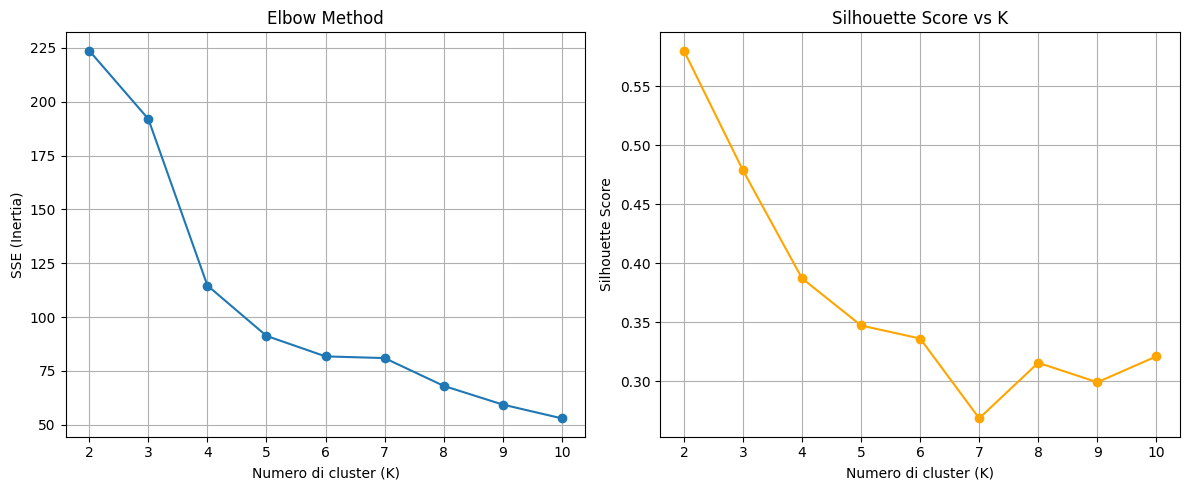

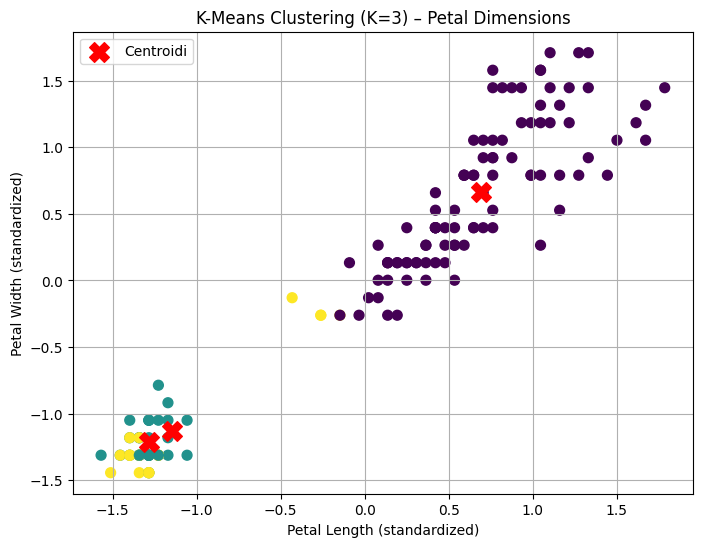

In [9]:
# STEP 2 – Standardizzazione dei dati
from sklearn.preprocessing import StandardScaler

# Selezioniamo tutte le 4 features numeriche
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standardizziamo le features per avere media 0 e deviazione standard 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# STEP 3 – K-Means con K iniziale = 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Aggiungiamo i cluster al DataFrame
df['cluster_k3'] = clusters

# STEP 4 – Elbow Method e Silhouette Score per determinare il numero ottimale di cluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []  # Somma delle distanze intra-cluster (inertia)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

# STEP 5 – Visualizzazione Elbow Method e Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Numero di cluster (K)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs K')
plt.xlabel('Numero di cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# STEP 6 – Scatter plot 2D dei cluster (usando solo 2 features per la visualizzazione)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            c='red', marker='X', s=200, label='Centroidi')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('K-Means Clustering (K=3) – Petal Dimensions')
plt.legend()
plt.grid(True)
plt.show()


Quale valore di K risulta ottimale?
Secondo l’Elbow Method, il punto di "gomito" si osserva a K = 3, dove la riduzione dell’inerzia (SSE) inizia a diventare meno significativa. Anche il Silhouette Score tende ad essere massimo o comunque elevato per K = 2 o K = 3, indicando che questi valori rappresentano una buona segmentazione dei dati.

In conclusione, K = 3 è il valore ottimale. Questo risultato è coerente anche con la classificazione originale del dataset Iris, che include tre classi: Setosa, Versicolor e Virginica.

Come cambia il comportamento del modello aumentando il numero di cluster?
Per valori di K inferiori a 3, il modello tende a sottosegmentare i dati. Ad esempio, con K = 2, due specie di Iris possono essere raggruppate insieme, perdendo dettaglio nella distinzione. Sebbene il Silhouette Score possa essere elevato, la segmentazione risulta troppo generica.

Per valori di K superiori a 3, il modello inizia a suddividere classi coerenti in sottogruppi meno significativi. L’inerzia continua a diminuire, ma in modo meno efficiente, e il Silhouette Score tende a peggiorare. Questo indica una segmentazione meno chiara e una tendenza all’overfitting, con la creazione di cluster non giustificati dalla struttura naturale dei dati.

In sintesi, aumentare il numero di cluster oltre K = 3 non migliora la qualità della segmentazione, ma introduce una complessità non necessaria.